In [6]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.loc[(client_data['similarity'] > 1)] = 1
        data = data.append(client_data)
    data = data.groupby(data.index).mean()
    return data




In [1]:
def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf


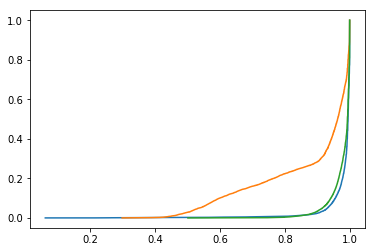

In [10]:
data0 = read_clients("faulty/0%/sim")
data10 = read_clients("faulty/10/sim")
data10_1 = read_clients("faulty/10%/sim")

data_im = read_clients("im/sim")

getECDF(data0).plot()
getECDF(data10_1).plot()
getECDF(data_im).plot()

plt.show()